Neuromorphic engineering I

## Lab 1: Automated Data Acquisition and Analysis

Group number:

Team member 1: Pietro Bonazzi

Date:

-------------------------------------------------------------------------------------------------------------------

You need to bring your own USB cable to connect the board with your own PC.

The objectives of this lab are as follows:

- To become acquainted with the experimental board setup.

- To become acquainted with Python for data acquisition and manipulation.

- To measure and characterize a NFET.

The aim of this first lab is to familiarize everyone with the lab equipment and software.

# 1. Getting started

## 1.1 Class chip documentation

You can find the documentation for the classchip here:
https://drive.google.com/drive/u/0/folders/1VBPKVfS9zwu_I2ExR1D0jU2eCSgleoQG

## 1.2 Python

If you are new to Python, you can find a detailed tutorial at the link: https://docs.python.org/3/tutorial/ . 

In particular the concepts in _3. An Informal Introduction to Python_ and in _4. More Control FLow Tools_ will be useful for the exercises you will have to solve. 

## 1.3 Report

You hand in the report (prelab + lab report + postlab) in both `.ipynb` and `.pdf` format as a group. Make sure that the markdowns are ran and the generated figures are shown.

The deadline is the beginning of the next lab.

There is no prelab for this week, but from the next week on you should finish the prelab before the lab starts.

## 1.4. Virtual machine 

If you are a Linux user you can skip this step. 

If you are a Windows or Mac user, we have set-up an Ubuntu-based virtual machine with the necessary libraries to communicate with the board. To import the existent virtual machine, Windows users should install VirtualBox. Mac users can either install VirtualBox or Parallels. If you want to use a pre-configured VirtualBox virtual machine with all the tools pre-installed then follow the instructions in the below.

To install VirtualBox, please follow these steps:

**For Windows users**

**Step 1.** Dowload VirtualBox

You can download VirtualBox from the link: https://www.virtualbox.org/wiki/Downloads , VirtualBox 6.1.26 platform packages -> Windows hosts 

Execute the .exe file and follow the steps. In the window "Would you like to install this device software" select Install.

Once the installation is complete, press Finish and launch the VirtualBox.


**Step 2.** Download the Ubuntu 20.04 ISO file

You can download the necessary files for the NE-I virtual machine from the link: https://ubuntu.com/.   Click 'Download' option on the Ubuntu website, on the left side of 'Ubuntu Desktop', you can click the green '20.04 LTS' button to download Ubuntu 20.04 ISO file.


**Step 3.** Import the file in VirtualBox and install Ubuntu

Once you launch VirtualBox, the window Oracle VM VirtualBox Manager should appear on your screen. Then follow this link https://itsfoss.com/install-linux-in-virtualbox/ from 'Step 3: Install Linux using VirtualBox'. 


**For Mac users**

**Step 1.** Dowload VirtualBox

You can download VirtualBox from the link: https://www.virtualbox.org/wiki/Downloads , VirtualBox 6.1.26 platform packages -> Windows hosts 

Execute the .dmg file and follow the steps.

Once the installation is complete, press Finish and launch the VirtualBox.


**Step 2.** Download the Ubuntu 20.04 ISO file

You can download the necessary files for the NE-I virtual machine from the link: https://ubuntu.com/.  Click 'Download' option on the Ubuntu website, on the left side of 'Ubuntu Desktop', you can click the green '20.04 LTS' button to download Ubuntu 20.04 ISO file.


**Step 3.** Import the file in VirtualBox and install Ubuntu

Once you launch VirtualBox, the window Oracle VM VirtualBox Manager should appear on your screen. Then follow this link https://medium.com/tech-lounge/how-to-install-ubuntu-on-mac-using-virtualbox-3a26515aa869

# 2. Python exercises

## 2.1  Jupyter Lab

You can install Jupyter Lab or Jupyter Notebook according to this link:https://jupyter.org/install

## 2.2  Making plots

* Plot a Sine curve from 0 to 2&#x3C0;  with 20 points. (Hint: Do not forget to properly label the axis and add figure legends when necessary.)

* Add a plot of a Cosine (Use the same range to the Sine plot, but set a different point marker and color.)

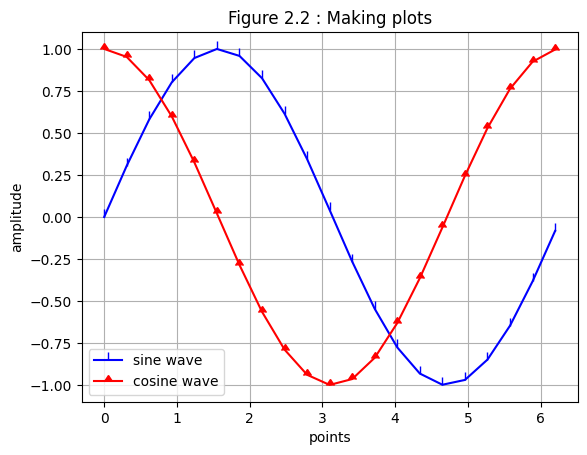

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math 

x= np.arange(0, 2*math.pi, 0.31)
y_sin= np.sin(x)
y_cos= np.cos(x)

plt.title('Figure 2.2 : Making plots')
plt.plot(x, y_sin, marker=2, color="blue")
plt.plot(x, y_cos, marker=10, color="red")
plt.xlabel("points")
plt.ylabel("amplitude")
plt.legend(["sine wave","cosine wave"])
plt.grid()
plt.show()

* Make a plot of the equation $ I_{ds} = I_0 e^{\frac{\kappa}{U_T} V_g}$ using the following parameters. Generate two plots, one with linear scaling and one with log scaling on the y axis. Put the right labels on both x axis and y axis. (Hint: use `plt.semilogy`)

In [4]:
Vg = np.arange(0, 1, 0.001)
Io = 1e-13
k = 0.6
UT = 25e-3

In [5]:
Ids = np.fromiter((Io*math.exp(k*Vg[i]/UT) for i in range(len(Vg))), float)

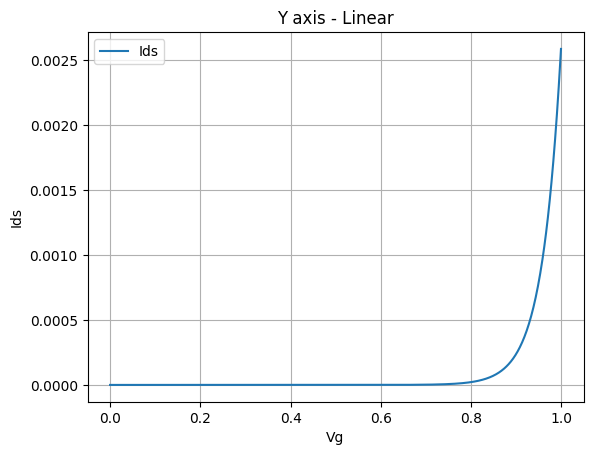

In [12]:
plt.title('Y axis - Linear')
plt.plot(Vg, Ids)
plt.xlabel("Vg")
plt.ylabel("Ids")
plt.legend(["Ids"])
plt.grid()
plt.show()

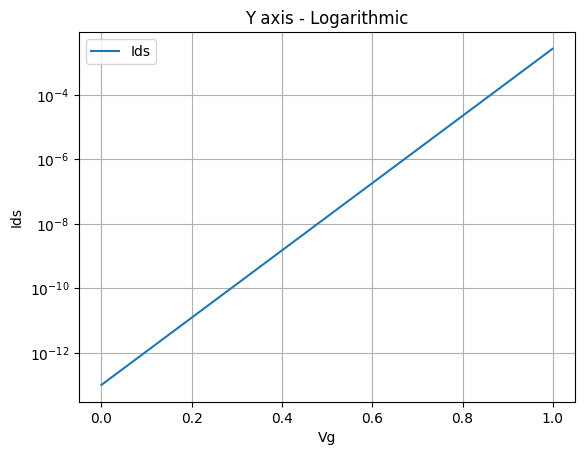

In [13]:
plt.title('Y axis - Logarithmic')
plt.semilogy(Vg, Ids)
plt.xlabel("Vg")
plt.ylabel("Ids")
plt.legend(["Ids"])
plt.grid()
plt.show()

## 2.3 Saving and loading data

You may want to work on the data for your report after the lab. Use `np.savetxt('data.csv', data, delimiter=',')` to save it to the working directory.

In [10]:
# define data
data = [Vg,Ids]
# save to csv file
np.savetxt('data/01_intro/data.csv', data, delimiter=',')

Check if the data saved is correct by loading it again using `np.loadtxt('data.csv', delimiter=',')` and plot.

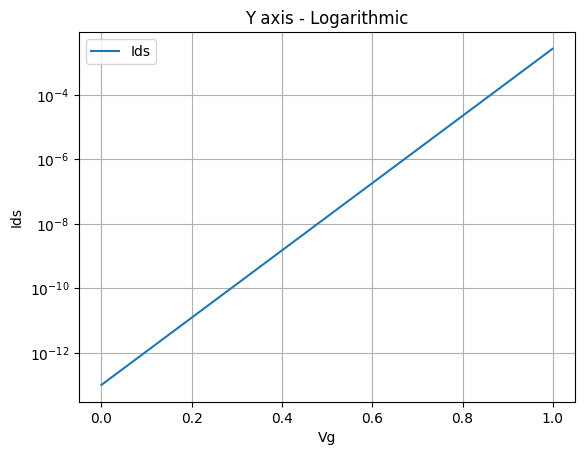

In [15]:
 # load from csv file
x, y = np.loadtxt('data/01_intro/data.csv', delimiter=',')
# plot
plt.title('Y axis - Logarithmic')
plt.semilogy(Vg, Ids)
plt.xlabel("Vg")
plt.ylabel("Ids")
plt.legend(["Ids"])
plt.grid()
plt.show()

## 2.4 Fitting data with a line

Sometimes you may need to find the relationship between data using regression. Try to extract the slope and intercept of the following given data using linear regression with `np.polyfit`

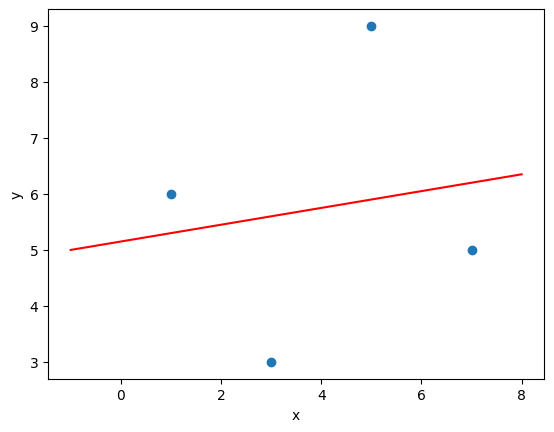

In [16]:
x = np.array([1, 3, 5, 7])
y = np.array([ 6, 3, 9, 5 ])
m, b = np.polyfit(x,y, 1)

# compare the original data points and the fitted line
x_lin_reg = np.arange(min(x)-2, max(x)+2, 1)
model = m, b
predict = np.poly1d(model)
y_lin_reg = predict(x_lin_reg)

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.show()

-------------------------------------------------------------------------------------------------------------------

# 3 Experiments

From now on you will be using the real board!

## 3.0 How to install pyplane

In order to communicate with the chip through Python you need to install _pyplane_ , a library that provides an easy interface to control the chip from jupyter notebook. The interface requires to use Ubuntu 20.04. You can follow different methods based on your machine's operating system.

### 3.0.1 Installing _pyplane_ using pip

Open a command window and run `pip install pyplane`

### 3.0.2 Set up the USB connection of the teensy board in the Virtual machine 

**Windows users**

1. check teensy vendor and product id

lsusb

you should see something like "XXXX:YYYY" for teensy

2. add usb rules

cd /etc/udev/rules.d

sudo gedit 10-my-usb.rules

Add the information in this 10-my-usb.rules file and save it: 
ATTR{idVendor}=="XXXX", ATTR{idProduct}=="YYYY", MODE="0666", GROUP="dialout"

3. add user to group and change mode

sudo usermod -a -G dialout $USER

sudo chmod a+rw /dev/ttyACM0

4. restart the virtual machine

**Mac Users**

*Step 1* Settings --> Ports --> USB Add Teensyduino USB Serial 

*Step 2* Device --> Connect

*Step 3* Change mode: sudo chmod a+rw /dev/ttyACM0

*Step 4* Restart kernel in Jupyter noytebook

*Step 5* Run the code again

## 3.1 Load the firmware (you can skip this step)

You don't need to load the firmware,we have done it for you.

To load the firmware, please follow these steps:

Step 1. Dowload and install the Teensy Loader

wget https://www.pjrc.com/teensy/teensy_linux64.tar.gz

wget https://www.pjrc.com/teensy/00-teensy.rules

sudo cp 00-teensy.rules /etc/udev/rules.d/

tar -xvzf teensy_linux64.tar.gz

./teensy &

You will see
![image_1.png](attachment:image_1.png)

Step 2. Load main.hex

Connect the board to your computer by USB

Open maim.hex file
![image_2.png](attachment:image_2.png)

Press button on Teensy to manually enter Program Mode
![image_3.png](attachment:image_3.png)

Program
![image_4.png](attachment:image_4.png)

Reboot
![image_6.png](attachment:image_6.png)

## 3.2 Set up the communication between jupyter notebook and PCB

Verify that the LEDs of your board are on as in the following picture

![image_8.jpg](attachment:image_8.jpg)

In [2]:
# import the necessary library to communicate with the hardware
import sys
import pyplane
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create a Plane object and open the communication
if 'p' not in locals():
    p = pyplane.Plane()
    try:
        p.open('/dev/ttyACM0')
    except RuntimeError as e:
        print(e)

Make sure all these steps are executed correctly (the [*] in front of the line turns into a number)

In [4]:
# Send a reset signal to the board
reset_type = pyplane.ResetType(0)
p.reset(pyplane.ResetType.Soft)

<TeensyStatus.Success: 0>

Was the LED flashing? How? 

     
    Yes, it was one rapid blinck.

    
    How is this feature implemented? ... The computer continuosly sends 3 byte commands which can be transfered back to back in the same packets. The reset command is sent using 0 in all bits of the first byte.


In [5]:
#NOTE: You must send this request events every time you do a reset operetion, otherwise the recieved data is wrong. 
p.request_events(1)

You could check firmware version, which should be 1.8.3.

In [22]:
p.get_firmware_version()

(1, 8, 4)

See all the possible functions 

In [7]:
dir(pyplane)

['AdcChannel',
 'BitDepth',
 'Coach',
 'CoachInputEvent',
 'CoachOutputEvent',
 'CurrentRange',
 'DacChannel',
 'Plane',
 'ResetType',
 'TeensyStatus',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'get_version',
 'pyplane']

## 3.3 Basic function operation

You can set and read voltage using function p.set_voltage and p.read_voltage.

Very importantly, all voltage you set on this board must be between 0 and 1.8 V!

Now set a voltage at AIN0

In [8]:
p.set_voltage(pyplane.DacChannel.AIN0, 0.65)

0.6492669582366943

Because of the quantization error of the DAC, you may want to see the actual value you have set using p.get_set_voltage

In [11]:
p.get_set_voltage(pyplane.DacChannel.AIN0)

0.6492669582366943

Read the voltage at adc channel AOUT0

In [ ]:
p.read_voltage(pyplane.AdcChannel.AOUT0)

0.9208739995956421

Read the voltage at adc channel GO22

In [ ]:
p.read_current(pyplane.AdcChannel.GO22)

8.300781395575996e-09

## 3.4 AER

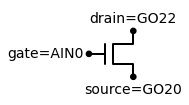

In [ ]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.NFet, reverse=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.drain, toplabel='drain=GO22')
d.add(elm.Dot, xy=Q.source, botlabel='source=GO20')
d.draw()

Read the current of the drain of the transistor.

In [ ]:
src = p.set_voltage(pyplane.DacChannel.GO20, 0)
print("The voltage at the source is {} V".format(src))

gate = p.set_voltage(pyplane.DacChannel.AIN0, 1.8)
print("The voltage at the gate is {} V".format(gate))

drain = p.set_voltage(pyplane.DacChannel.GO22, 1.8)
print("The voltage at the drain is {} V".format(drain))

I_ds = p.read_current(pyplane.AdcChannel.GO22)
print("The measured drain current is {} A".format(I_ds))

The voltage at the source is 0.0 V
The voltage at the gate is 1.7982406616210938 V
The voltage at the drain is 1.7982406616210938 V
The measured drain current is 6.835937682581061e-08 A


Do you think this current is reasonable? WHy?

    No. For a N-FET transitor with these initialization voltages, I would have expected to measure a higher current from the drain to the source. The maximum current in the pins is 10 micro ampere, my measurements are off of at least two degree of magnitude.

Now try to set voltage of this transistor by AER (Address Event Representation).

Find the documentation "chip_architecture.pdf" for the classchip introduced in 1.1. See how to select signal communication on pages 11 and 21. 

Because you need to read the current and write the voltage of the NFET. You have to set demultiplexer by sending the configuration event:

In [ ]:
events = [pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.NoneSelected, \
    pyplane.Coach.VoltageInputSelect.SelectLine2, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)]

p.send_coach_events(events)

**Make sure the chip receives the event by a blink of LED1, if it's not the case, the chip is dead.**

Now set source GO20 voltage using the function introduced above

In [ ]:
p.set_voltage(pyplane.DacChannel.GO20, 0)

0.0

Set drain GO22 voltage

In [ ]:
p.set_voltage(pyplane.DacChannel.GO22, 1.8)

1.7982406616210938

Set trial gate AIN0 voltage (you can try different voltage between 0~1.8V to see different output current)

In [ ]:
p.set_voltage(pyplane.DacChannel.AIN0, 1.8)

1.7982406616210938

Read drain GO22 current

In [ ]:
I_d = p.read_current(pyplane.AdcChannel.GO22)
print("The measured drain current is {} A".format(I_d))

The measured drain current is 9.968262020265684e-07 A


Compare this current with the drain current measured above. 

    This measurement is more realistic than the previous one. However [according to section 2.5 of the chip architecture document], I should have measured a current around 10 e-06.

Set trial gate AIN0 voltage 0 and see if the drain current is also zero. If not, why?

In [ ]:
p.set_voltage(pyplane.DacChannel.AIN0, 0)
I_d = p.read_current(pyplane.AdcChannel.GO22)
print("The measured drain current is {} A".format(I_d))

The measured drain current is 6.909179717240477e-08 A


    The current is greater than zero, because the resistence in the channel is not infinity. (Ohm's law). Therefore, a leakage current is detected.

Now you can try some challenging experiments!
Sweep gate voltage between 0~1V and see how the output current change

In [ ]:
import time

# Get the leakage current, Read Ids=Ids0 at Vg = 0
p.set_voltage(pyplane.DacChannel.AIN0,0.0)  
time.sleep(0.5) # wait 0.5 second for it to settle

Is0_n =  p.read_current(pyplane.AdcChannel.GO20_N)
print("Offset Is0_n: {} A".format(Is0_n))

# Initialize variables
number = 70
Vg_sets = np.linspace(0.0,1.0,num = number).reshape(-1,1)
Is_sets = np.zeros(number).reshape(-1,1)

#Sweep gate voltage
for n in range(number):
    
    # set gate voltage
    p.set_voltage(pyplane.DacChannel.AIN0,Vg_sets[n])
    postlab = p.get_set_voltage(pyplane.DacChannel.AIN0)
    
    time.sleep(0.05)  # wait for it to settle
    
    # read I_{ds}
    Is_set = p.read_current(pyplane.AdcChannel.GO20_N)
    
    # substract leakage current 
    Is_sets[n] = Is_set - Is0_n

Offset Is0_n: 4.150390697787998e-09 A


Text(0, 0.5, 'Ids (A)')

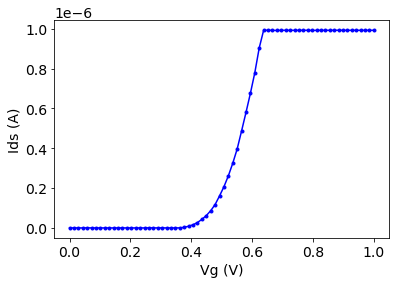

In [ ]:
# plot in linear scale
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.plot(Vg_sets,Is_sets,'.b-')
plt.xlabel('Vg (V)')
plt.ylabel('Ids (A)')

# 4. Clean up

Well done! That's all for today.

Remember you have to clean up in the end just as in a real lab!

* Close you device and release memory by doing

In [ ]:
del p

* Save your changes
* Download the files you need for the report to your own PC

# 5. Postlab Questions

1. Why is there no pin for the bulk of NFET? What is it's voltage then?

    The voltage at the bulk is 0 by design because it is part of the substrate and tied to zero.

2. How precise are the measurements of voltage and current using DAC?

In [ ]:
p.read_voltage(pyplane.AdcChannel.AOUT0)

0.9208739995956421

In [ ]:
p.read_current(pyplane.AdcChannel.GO20_N)

9.965820026991423e-07

    The resolutions for voltage and current are respectively 136 and 128 bits.

3. Do you think building a "computer" whose inputs and outputs are analog voltage/current signals is a good idea? Why or why not?

    It may be because because most of the signals that we measure in life have multiple states. 